In [1]:
import pandas as pd
import numpy as np


In [19]:
data =  pd.read_csv("Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Position"]=le.fit_transform(data["Position"])
data

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000
5,7,6,150000
6,6,7,200000
7,9,8,300000
8,1,9,500000
9,2,10,1000000


In [21]:
x = data[["Level"]].values
y=data["Salary"].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

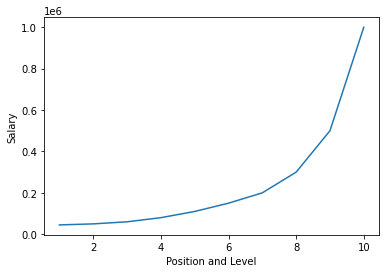

In [68]:
import matplotlib.pyplot as plt

plt.xlabel("Position and Level")
plt.ylabel("Salary")
plt.plot(x,y)


In [54]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(x,y,train_size=0.80,random_state=0)


In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain,yTrain)


LinearRegression()

In [56]:
yPred=model.predict(xTest)

In [57]:
yPred

array([ 44275.9295499 , 543473.58121331])

In [58]:
model.predict([[5.5]])

array([252274.95107632])

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
modelP=LinearRegression()
modelP.fit(x_poly,y)
modelP.predict(x_poly)

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

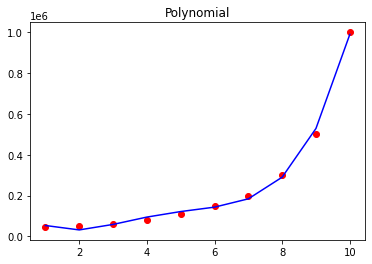

In [70]:
plt.scatter(x,y,color="red")
plt.plot(x,modelP.predict(x_poly),color="blue")
plt.title("Polynomial")
plt.show()

In [53]:

modelP.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750003])